# Data Analysis

We will be looking at date from the [Dog Breed Identification Challenge](https://www.kaggle.com/c/dog-breed-identification/data), a challenge created at [Stanford](http://vision.stanford.edu/aditya86/ImageNetDogs/) and is a subset of the ImageNet classification challenge.

* NOTE: **do not use the GPU accelerator in this notebook**
  * we must conserve that precious 30 Hour GPU runtime

## Mounting Google Drive Data

* Lets find out how to explore our data on our Google Drive account
* [this guide](https://medium.com/@navneetkumar11/loading-image-data-from-google-drive-to-google-colab-using-pytorchs-dataloader-2e5617978a63) shows how to connect the dirrectory as shown in the coding cell below
  * Note: once the drive has been mounted, it will re-mount itself even after the kernel has been killed (so there is no need to re-authenticate during each session) 

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
ls /content/gdrive

'My Drive'/


In [41]:
ls '/content/gdrive/My Drive/dogs/data/dog-breed-identification/'

labels.csv     numpy_dogs.py.gdoc     test_numpy.p  train_numpy.p
labels.gsheet  sample_submission.csv  test.zip      train.zip
numpy_dogs.py  test/                  train/


In [0]:
data_path = '/content/gdrive/My Drive/dogs/data/dog-breed-identification/'

Nice! Now the google drive for this project has been mounted. The mount path has been saved for future use. Now lets look explore our data.

## Exploring Our Data

* [more info](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html) on variables in IPython kernel

In [43]:
!ls {"'" + data_path + "'"}

labels.csv     numpy_dogs.py.gdoc     test_numpy.p  train_numpy.p
labels.gsheet  sample_submission.csv  test.zip	    train.zip
numpy_dogs.py  test		      train


We have some image directories as well as some CSVs that describe the labels. Lets first open the labels CSV to see how our training data is managed. 

In [44]:
import pandas as pd

labels = pd.read_csv(data_path + 'labels.csv')

labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [45]:
labels.shape

(10222, 2)

It looks like we just have image ids along with the dog's associated breed. There's a little over 10,000 images in this dataset with 120 unique labels. Let's explore these dogbreeds a little further.

* [solution](https://stackoverflow.com/questions/51080491/matplotlib-how-to-change-figsize-for-double-bar-plot/51081443) to fixing figuresize of bargraph

In [46]:
breed_counts = labels["breed"].value_counts()

breed_counts

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

Text(0.5, 1.0, 'Dog Breeds')

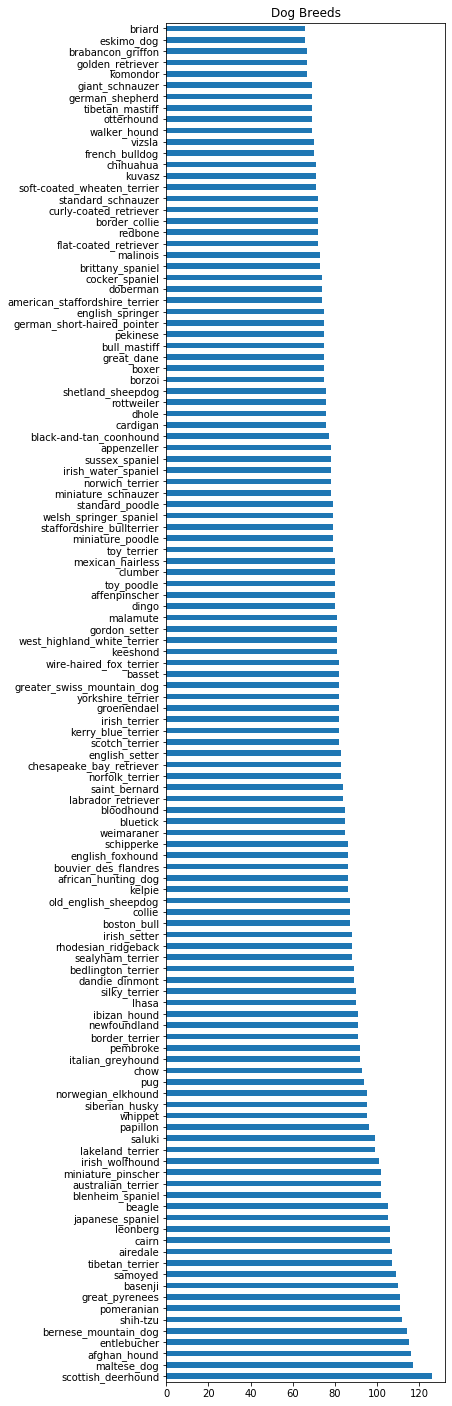

In [47]:
import matplotlib.pyplot as plt

breed_counts.plot.barh(figsize=(5, 25))

plt.title("Dog Breeds")

 * another visualization of the dog breeds (from [this article](https://medium.com/@iliazaitsev/dogs-breeds-classification-with-keras-b1fd0ab5e49c))

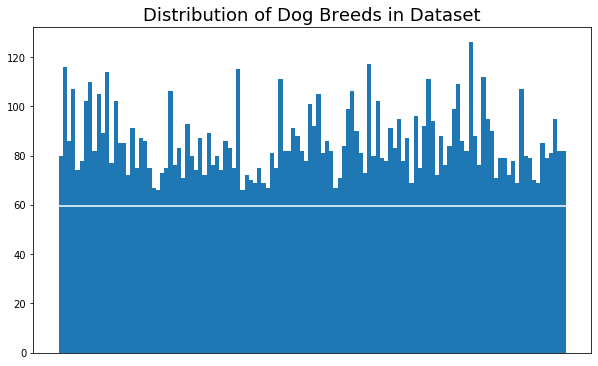

In [48]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

encoder = LabelEncoder()
breeds_encoded = encoder.fit_transform(labels.breed)
n_classes = len(encoder.classes_)
mean = np.mean(breeds_encoded)
title = 'Distribution of Dog Breeds in Dataset'

f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_xticks([])
ax.hlines(mean, 0, n_classes - 1, color='white')
ax.set_title(title, fontsize=18)
_ = ax.hist(breeds_encoded, bins=n_classes)



There's all 120 of them 💗. There seems to be an equal amount of image data across each breed. 

Now lets take a quick look at the sample submission CSV.

In [0]:
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')

In [50]:
sample_submission

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [51]:
sample_submission.iloc[0][1:]

affenpinscher                     0.00833333
afghan_hound                      0.00833333
african_hunting_dog               0.00833333
airedale                          0.00833333
american_staffordshire_terrier    0.00833333
                                     ...    
welsh_springer_spaniel            0.00833333
west_highland_white_terrier       0.00833333
whippet                           0.00833333
wire-haired_fox_terrier           0.00833333
yorkshire_terrier                 0.00833333
Name: 0, Length: 120, dtype: object

In [52]:
sample_submission.iloc[0][1:].sum()

0.9999999999999973

For each image, a score is given predicting how likely it is to be of a certain breed. All of these values combined add up to 1 as demonstrated in the code above ([more info on evaluation](https://www.kaggle.com/c/dog-breed-identification/overview/evaluation)).

With the CSVs out of the way, it is time to explore our image data.

## Viewing Image Data

Now it's time to look at our image data. Lets start by looking at the first image in the training set.

In [53]:
!ls {"'" + data_path + "train" + "'"} | head

000bec180eb18c7604dcecc8fe0dba07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg
001cdf01b096e06d78e9e5112d419397.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg
002211c81b498ef88e1b40b9abf84e1d.jpg
00290d3e1fdd27226ba27a8ce248ce85.jpg
002a283a315af96eaea0e28e7163b21b.jpg
003df8b8a8b05244b1d920bb6cf451f9.jpg
0042188c895a2f14ef64a918ed9c7b64.jpg


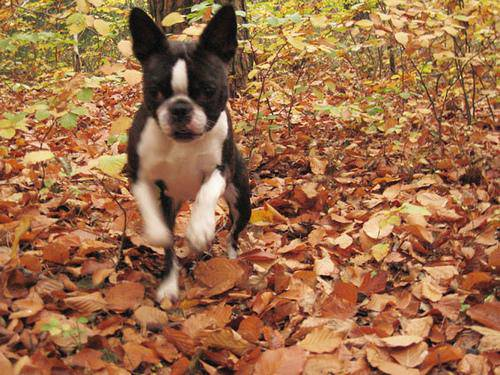

In [54]:
from IPython.display import Image

Image(data_path + 'train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [55]:
labels[labels["id"] == '000bec180eb18c7604dcecc8fe0dba07']['breed']

0    boston_bull
Name: breed, dtype: object

It looks like our first good boy is a boston bull. Nice!

## Splitting our Data

* this will go over how our data can be split for smaller models
* this includes decreasing the number of images (while providing an equal amount of data across all classes) and reducing the amount of labels for our model

We have a couple of ways to reduce labels:
1. choosing the top n breeds (maybe start with 5)
2. we can group similar breeds (this would be objective interpretation of similarity)

To find similar breeds, we can pair breeds with similar key words. With a little bit of data manipulation, we can find the top key words within the dog breed labels. We will list the top ten key words in the code cell below.

In [56]:
from collections import OrderedDict
from collections import Counter

# this gets a list of the breeds (with underscore removed)
breeds = list(map(lambda x: x.split("_"), labels.breed.unique()))

# this creates a list of all the unique words in the breeds list
breed_words = [item for sublist in breeds for item in sublist]

# this creates a sorted dictionary of the unique word counts (in descending order)
sorted_x = sorted(Counter(breed_words).items(), key=lambda kv: kv[1], reverse=True)

sorted_x[0:10]

[('terrier', 18),
 ('spaniel', 7),
 ('retriever', 5),
 ('dog', 5),
 ('irish', 4),
 ('english', 4),
 ('hound', 3),
 ('schnauzer', 3),
 ('setter', 3),
 ('poodle', 3)]

We now have the top 10 words. We could make larger groups such as terriers, spaniels, retrievers and poodles to create new labels. Obviously key words like 'dog' are not going to represent a group of labels ('dog' represents all dogs). This is why we should be cautious about arbitrarily creating larger categories to represent several breeds. Terriers and retrievers might share common breed characteristics, but it there could be too much overlap between these larger groups. Therefore, it is probably best to choose the top n breeds to reduce the amounts of labels and data, but it's still worth exploring if a machine learning model can predict these more generalized groups. 

## Processing Our Image Data

Now that we understand our image data, we need to format our data so it can be read for a machine learning model. This can be achieved by creating a numpy array of the data, essentially a multi-dimensional array representing the image where each pixel is represented by a set of RGB float values. We have two goals in image processing:
1. compressing the data
2. creating a uniform image size

### First Image Resizing Example

I will create a function that takes in an image resolution, an image directory, and a number representing the first n values of the directory to be converted into a numpy array. The image will then be cropped and vectorized into a numpy array with standard values between 0.0 and 1.0. 

It is important to note that the method we use to resize our images (using the **.resize()** object function) **does not** crop the data in a square, rather it stretches the image in a box. This could lead to distorted interpretations of the image by our machine learning model, so we might want to consider cropping as an alternative form of image manipulation.

* note: the kernel seems to slow down after 3000 images are processed, which doesn't match the time it takes the author to vectorize his data
  * this appears to be a memory limitation of our kernel, because this change happens immediately (not gradually)
  * this runs fast on local machines, so we will just run the script below on a local machine and store the data in pickle files ('train_numpy.p' and 'test_numpy.p' in the data directory)
    * here's the [python script](https://drive.google.com/file/d/14e6xSnfk0BjGHxfRZoKKPbf2rQCfCDuX/view?usp=sharing) we ran locally

#### Possible Improvements
* change PIL to OpenCV library (to standardize this notebook's coding style)
* instead of resizing the data, try to find a method that crops randomly or attempts to crop at center
  * cropping randomly could help prevent overfitting in the model

In [0]:
import numpy as np
import os
import PIL.Image

# Time Libraries
import time
from datetime import timedelta

def image_cleanup(image_width, image_height, image_directory, n="default"):
  """
  Returns a numpy vector of a numpy directory of images

  Note:
  * image_directory must end with '/' 
  * n represents the first n amount images to process
  """
  image_names = os.listdir(data_path + image_directory)

  if n == "default":
    n = len(image_names)

  print(str(n) + " images to process\n")

  start_time = time.time()
  current_time = start_time

  # create a tuple for the compressed image shape
  # (# of images, width, height, RGB)
  shape = (n, image_width, image_height, 3)
  # this is a list of numpy 
  image_list = np.zeros(shape)
  
  for file in enumerate(image_names):
    
    if(file[0] == n):
      break

    # We first create an image object
    test_image = PIL.Image.open(data_path + image_directory + file[1])
    # Then we resize the image 
    test_image = test_image.resize((image_width, image_height))
    # Finally, we convert the image to a standardized numpy array
    test_image = np.array(test_image)
    test_image = np.clip(test_image/255.0, 0.0, 1.0)

    image_list[file[0]] = test_image

    if file[0] % 500 == 0 and file[0] != 0:
      print(str(file[0]) + " images processed")\

      # Time Check
      previous_time = current_time
      current_time = time.time()
      time_dif = current_time - previous_time
      print("Time between: " + str(timedelta(seconds=int(round(time_dif)))) + "\n")

  end_time = time.time()

  time_dif = end_time - start_time
  print("Time to run: " + str(timedelta(seconds=int(round(time_dif)))))

  return image_list

In [58]:
train_1000_np = image_cleanup(60, 60, 'train/', 1000)

1000 images to process

500 images processed
Time between: 0:00:03

Time to run: 0:00:05


Now 1000 images in the training set are represented as numpy arrays. This is what the machine learning model "sees". Lets look at one of the numpy images in its full glory:

In [59]:
train_1000_np[0]

array([[[1.        , 1.        , 0.99215686],
        [0.94509804, 0.94509804, 0.9372549 ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.71764706, 0.76078431, 0.7372549 ],
        [0.80784314, 0.85098039, 0.82745098],
        [0.97254902, 0.97254902, 0.97254902],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.64705882, 0.65490196, 0.65098039],
        [0.95686275, 0.96470588, 0.96078431],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.68627451, 0.6745098 , 0.61568627],
        [0.73333333, 0.72156863, 0.6627451 ],
        [0.42745098, 0

Here is a visual representation of the compressed image. Notice that it is 60 x 60 and stretched into a square.

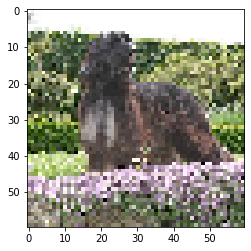

In [60]:
import matplotlib.pyplot as plt

plt.imshow(train_1000_np[0])

* We will have the processed arrays (on local machine) as pickle files as mentioned above 

In [0]:
import pickle 

training_data = pickle.load(open(data_path + "train_numpy.p", "rb"))

* Let's verify that our data was loaded in the correct order

In [62]:
training_data.shape

(10222, 60, 60, 3)

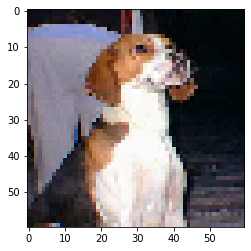

In [63]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1234])

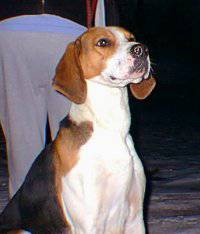

In [64]:
from IPython.display import Image

Image(data_path + 'train/' + labels.id[1234] + ".jpg")

It looks like it has! 🐶

## Preparing Data

In this section, we will go over how to prepare our data for our model. In our [Data Analysis notebook](https://colab.research.google.com/drive/1xSQsVrdrJDSaq3FFPmJQBiE58T8N7SC3#scrollTo=-zlGN7ZcRS4d), we transformed our image data into numpy arrays so the network could read our data. Now we must filter data by the top-n breeds and encode our labels into something legible for the network. 

To do this, we will create a function that returns the top-n:
  1. filtered labels
  2. filtered data
  3. map of labels (for one-hot encoding)
  3. one-hot encoded labels

### Selecting N most popular breeds

This covers the first two steps we are trying to achieve for our data preperation. Reducing our labels makes our model less complicated, but it also significantly reduces the amount of data we have to train with.

In [0]:
def top_n(n):
  """
  Get the top_n breeds of the dataset and
  returns an array of the top_n labels
    * assumes labels is a global value
  """

  # get the top_n labels
  top_n = list(labels["breed"].value_counts()[:n].axes[0])
  
  # Cool Print Statement
  print("These are the top " + str(n) + " breeds: \n\n" 
        + '\n'.join(str(x[0] + 1) + ". " + str(x[1]) for x in enumerate(top_n)))
  
  #top_n_labels = list(labels[labels.breed.isin(top_n)].index)
  
  return labels[labels.breed.isin(top_n)]

In [66]:
top_5_labels = top_n(5)

These are the top 5 breeds: 

1. scottish_deerhound
2. maltese_dog
3. afghan_hound
4. entlebucher
5. bernese_mountain_dog


In [0]:
# get the corresponding training data from the top_5 labels

top_5_training_data = training_data[list(top_5_labels.index)]

In [68]:
top_5_training_data.shape

(588, 60, 60, 3)

### One-Hot Encoding Labels

One-Hot encoding turns our labels into an array of 1's and 0's, similar to what is seen in sample submission CSV. Each image has an array to represent it's label. Each index in the array represents a specific label, and the label corresponding to an image is marked with a 1 (this data structure is shown below).

* [One-Hot Encoding Explained](https://www.youtube.com/watch?v=v_4KWmkwmsU)


In [69]:
import numpy as np

top_5_labels_map = list(top_5_labels.breed.unique())

top_5_labels_breeds = top_5_labels.breed.values

top_5_labels_one_hot = np.zeros((top_5_labels_breeds.size, 5))

for label in enumerate(top_5_labels_breeds):
  top_5_labels_one_hot[label[0]][top_5_labels_map.index(label[1])] = 1

## print everything

print(top_5_labels_map)

print()

print(top_5_labels_one_hot)

print()

print(list(map(lambda one_hot: top_5_labels_map[one_hot.tolist().index(1)], top_5_labels_one_hot)))

['scottish_deerhound', 'maltese_dog', 'entlebucher', 'bernese_mountain_dog', 'afghan_hound']

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

['scottish_deerhound', 'maltese_dog', 'scottish_deerhound', 'entlebucher', 'entlebucher', 'maltese_dog', 'bernese_mountain_dog', 'entlebucher', 'afghan_hound', 'scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog', 'bernese_mountain_dog', 'bernese_mountain_dog', 'maltese_dog', 'scottish_deerhound', 'scottish_deerhound', 'scottish_deerhound', 'maltese_dog', 'afghan_hound', 'bernese_mountain_dog', 'afghan_hound', 'bernese_mountain_dog', 'bernese_mountain_dog', 'bernese_mountain_dog', 'afghan_hound', 'scottish_deerhound', 'afghan_hound', 'afghan_hound', 'afghan_hound', 'maltese_dog', 'scottish_deerhound', 'bernese_mountain_dog', 'entlebucher', 'scottish_deerhound', 'bernese_mountain_dog', 'afghan_hound', 'entlebucher', 'maltese_dog', 'entlebucher', 'afghan_hound', 'entlebucher'

### A Function For Everything

We will now put everything into one function. This way, we can easily control the number of groups we would like our model to have.


In [0]:
def prepare_data(n, labels, data):
  """
  Returns the following items:
    1. Filtered Top-N Labels 
    2. Filtered Top-N Data
    3. Map of Labels for One-Hot Encoding (list form)
    4. One-Hot Encoded Labels
  """

  # get the top_n labels
  top_n = list(labels["breed"].value_counts()[:n].axes[0])

  top_n_labels = labels[labels.breed.isin(top_n)]
  
  top_n_data = data[list(top_n_labels.index)]

  # One - Hot Encoding Section
  top_n_labels_map = list(top_n_labels.breed.unique())

  top_n_labels_breeds = top_n_labels.breed.values

  top_n_labels_one_hot = np.zeros((top_n_labels_breeds.size, n))

  for label in enumerate(top_n_labels_breeds):
    top_n_labels_one_hot[label[0]][top_n_labels_map.index(label[1])] = 1

  return (top_n_labels, top_n_data, top_n_labels_map, top_n_labels_one_hot)

* now lets pull data for our top 10 groups

In [0]:
top_10_labels, top_10_data, top_10_labels_map, top_10_labels_one_hot = prepare_data(10, labels, training_data)

In [72]:
top_10_labels.head()

,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec,maltese_dog
57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu
70,01b36cb1b80ab8c3a7d2b7128ad21bdc,samoyed


In [73]:
top_10_data.shape

(1141, 60, 60, 3)

In [74]:
top_10_labels_map

['basenji',
 'scottish_deerhound',
 'maltese_dog',
 'shih-tzu',
 'samoyed',
 'entlebucher',
 'bernese_mountain_dog',
 'afghan_hound',
 'great_pyrenees',
 'pomeranian']

In [75]:
top_10_labels_one_hot.shape

(1141, 10)